## Projet Network Analysis de Awa Syr DIAGNE


In [1]:
import pandas as pd

In [2]:
## Chargement des données 
nouv_data = pd.read_excel("C:\\Users\\evasy\\OneDrive\\Bureau\\M2 MIASHS\\Network Analysis\\Projet_Julien_Velcin\\data_MIASHS_1\\df_concatene.xlsx")

In [3]:
nouv_data

,persee:dateOfPrintPublication{Literal}(xsd:gYear),marcrel:aut{URIRef}[0],marcrel:aut{URIRef}[1],marcrel:aut{URIRef}[2],marcrel:aut{URIRef}[3],marcrel:aut{URIRef}[4],marcrel:aut{URIRef}[5],marcrel:aut{URIRef}[6],marcrel:aut{URIRef}[7],marcrel:aut{URIRef}[8],...,cito:cites{URIRef}[86],cito:cites{URIRef}[87],cito:cites{URIRef}[88],cito:cites{URIRef}[89],cito:cites{URIRef}[90],cito:cites{URIRef}[91],cito:cites{URIRef}[92],cito:cites{URIRef}[93],Unnamed: 127,dcterms:title{Literal}[0]
0,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1986,http://data.persee.fr/authority/294338#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424064,1982,http://data.persee.fr/authority/228797#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424065,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424066,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
424067,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fonction 1 : Acquisition des données

 - Nombre de documents et taille moyenne, 
 

In [4]:
nouv_data['dcterms:identifier{Literal}'].count()

421463

Nous avons 421463 documents dans notre jeu de données 

- Nombre d’auteurs

Nous allons concatener toutes les colonnes ensemble en une seule série et ensuite compter le nombre d'auteurs uniques dans cette série.

In [5]:
import pandas as pd

# Sélectionner les colonnes contenant les noms des auteurs
colonnes_auteurs = nouv_data.iloc[:, 1:29]

# Concaténer les colonnes en une seule série
serie_auteurs = pd.concat([colonnes_auteurs[colonne] for colonne in colonnes_auteurs], ignore_index=True)

# Calculer le nombre total d'auteurs uniques
nombre_total_auteurs = serie_auteurs.nunique()

print("Nombre total d'auteurs uniques :", nombre_total_auteurs)


Nombre total d'auteurs uniques : 84986


- Distribution des documents par auteur

Nombre d'auteur par documents : nb documents/ nb auteurs= 4,95 : Nous pouvons dire que nous avons environs 5 auteurs par documents

 - Distribution temporelle s’il y a lieu

In [6]:
import pandas as pd

# Supposons que votre DataFrame s'appelle 'nouv_data'

# Convertir la colonne 'année' en format numérique (si ce n'est pas déjà le cas)
nouv_data['persee:dateOfPrintPublication{Literal}(xsd:gYear)'] = pd.to_numeric(nouv_data['persee:dateOfPrintPublication{Literal}(xsd:gYear)'], errors='coerce')

# Filtrer les lignes où l'année est en format numérique
nouv_data_numerique = nouv_data.dropna(subset=['persee:dateOfPrintPublication{Literal}(xsd:gYear)'])
# Regrouper les données par année et compter le nombre d'auteurs uniques dans chaque groupe
nombre_auteurs_par_annee = nouv_data_numerique.groupby('persee:dateOfPrintPublication{Literal}(xsd:gYear)')["marcrel:aut{URIRef}[0]"].nunique()

print("Nombre d'auteurs par année", nombre_auteurs_par_annee)

Nombre d'auteurs par année persee:dateOfPrintPublication{Literal}(xsd:gYear)
1837.0      4
1838.0      1
1840.0     34
1841.0     41
1842.0     25
         ... 
2017.0    702
2018.0    522
2019.0    270
2020.0    166
2021.0      5
Name: marcrel:aut{URIRef}[0], Length: 184, dtype: int64


In [7]:
max = nombre_auteurs_par_annee.sort_values(ascending=False)
print(max)

persee:dateOfPrintPublication{Literal}(xsd:gYear)
1996.0    3995
1999.0    3970
1994.0    3964
1995.0    3947
1998.0    3876
          ... 
1842.0      25
1849.0      23
2021.0       5
1837.0       4
1838.0       1
Name: marcrel:aut{URIRef}[0], Length: 184, dtype: int64


### Fonction 2 :Prise en compte de la structure du corpus

Pour ma part , je vais construire un graphe où les noeuds représentent les auteurs et les liens les co-autorat

In [9]:
## Changement du nom des colonnes auteur et co-auteurs
## Pour auteur elle sera nommé Auteur 
## Pour co-auteur ca sera nommé colonne 1,2,3,etc...

In [10]:
nouv_data = nouv_data.rename(columns={'marcrel:aut{URIRef}[0]': 'auteur','marcrel:aut{URIRef}[1]':'1','marcrel:aut{URIRef}[2]':'2','marcrel:aut{URIRef}[3]':'3','marcrel:aut{URIRef}[4]':'4','marcrel:aut{URIRef}[5]':'5','marcrel:aut{URIRef}[6]':'6','marcrel:aut{URIRef}[7]':'7','marcrel:aut{URIRef}[8]':'8','marcrel:aut{URIRef}[9]':'9','marcrel:aut{URIRef}[10]':'10','marcrel:aut{URIRef}[11]':'11','marcrel:aut{URIRef}[12]':'12','marcrel:aut{URIRef}[13]':'13','marcrel:aut{URIRef}[14]':'14','marcrel:aut{URIRef}[15]':'15'})

In [11]:
# Étape 2: Prétraitement des données (regrouper les noms d'auteurs et de co-auteurs)
auteurs = nouv_data["auteur"].tolist()  # Supposons que 'auteur' est la colonne contenant les noms des auteurs
co_auteurs = nouv_data.iloc[:, 2:15].values.tolist()  # Supposons que les colonnes 2 à 6 contiennent les noms des co-auteurs



### Pour création du graphe , nous allons définir plusieurs critères ,nous prendrons : 
 

* Les auteurs qui ont plus de 750 coauteurs 

In [12]:
coauteurs_count = nouv_data['auteur'].value_counts()
coauteurs_count

http://data.persee.fr/authority/204226#Person    5109
http://data.persee.fr/authority/394562#Person    1806
http://data.persee.fr/authority/196565#Person    1749
http://data.persee.fr/authority/33031#Person     1729
http://data.persee.fr/authority/300218#Person    1459
                                                 ... 
http://data.persee.fr/authority/72170#Person        1
http://data.persee.fr/authority/72171#Person        1
http://data.persee.fr/authority/72174#Person        1
http://data.persee.fr/authority/60363#Person        1
http://data.persee.fr/authority/392897#Person       1
Name: auteur, Length: 66217, dtype: int64

In [13]:
auteurs_filtrés = coauteurs_count[coauteurs_count >= 750].index.tolist()
auteurs_filtrés

['http://data.persee.fr/authority/204226#Person',
 'http://data.persee.fr/authority/394562#Person',
 'http://data.persee.fr/authority/196565#Person',
 'http://data.persee.fr/authority/33031#Person',
 'http://data.persee.fr/authority/300218#Person',
 'http://data.persee.fr/authority/33167#Person',
 'http://data.persee.fr/authority/144129#Person',
 'http://data.persee.fr/authority/144620#Person',
 'http://data.persee.fr/authority/58528#Person',
 'http://data.persee.fr/authority/32976#Person',
 'http://data.persee.fr/authority/388906#Person',
 'http://data.persee.fr/authority/29794#Person',
 'http://data.persee.fr/authority/250614#Person',
 'http://data.persee.fr/authority/272972#Person',
 'http://data.persee.fr/authority/274943#Person',
 'http://data.persee.fr/authority/247067#Person']

In [14]:
data_filtré = nouv_data[nouv_data['auteur'].isin(auteurs_filtrés)] ## dataFrame avec que les auteurs ayant au moins 750  coauteurs
data_filtré

,persee:dateOfPrintPublication{Literal}(xsd:gYear),auteur,1,2,3,4,5,6,7,8,...,cito:cites{URIRef}[86],cito:cites{URIRef}[87],cito:cites{URIRef}[88],cito:cites{URIRef}[89],cito:cites{URIRef}[90],cito:cites{URIRef}[91],cito:cites{URIRef}[92],cito:cites{URIRef}[93],Unnamed: 127,dcterms:title{Literal}[0]
14673,1929.0,http://data.persee.fr/authority/274943#Person,http://data.persee.fr/authority/275656#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14682,1929.0,http://data.persee.fr/authority/274943#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14699,1929.0,http://data.persee.fr/authority/274943#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14700,1929.0,http://data.persee.fr/authority/274943#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14701,1929.0,http://data.persee.fr/authority/274943#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415787,1997.0,http://data.persee.fr/authority/250614#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415823,1997.0,http://data.persee.fr/authority/250614#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415896,1998.0,http://data.persee.fr/authority/250614#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
416019,1999.0,http://data.persee.fr/authority/250614#Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Filtrer les auteurs ayant plus de 750 coauteurs
auteurs_filtrés = coauteurs_count[coauteurs_count >= 750].index.tolist()

# Filtrer les données originales en ne gardant que les lignes correspondant aux auteurs filtrés
data_filtré = nouv_data[nouv_data['auteur'].isin(auteurs_filtrés)]

C:\Users\evasy\AppData\Local\Temp\ipykernel_26140\2424479647.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtré['co_auteurs'] = data_filtré.apply(lambda row: ','.join([str(row[i]) for i in range(1, 17)]), axis=1)


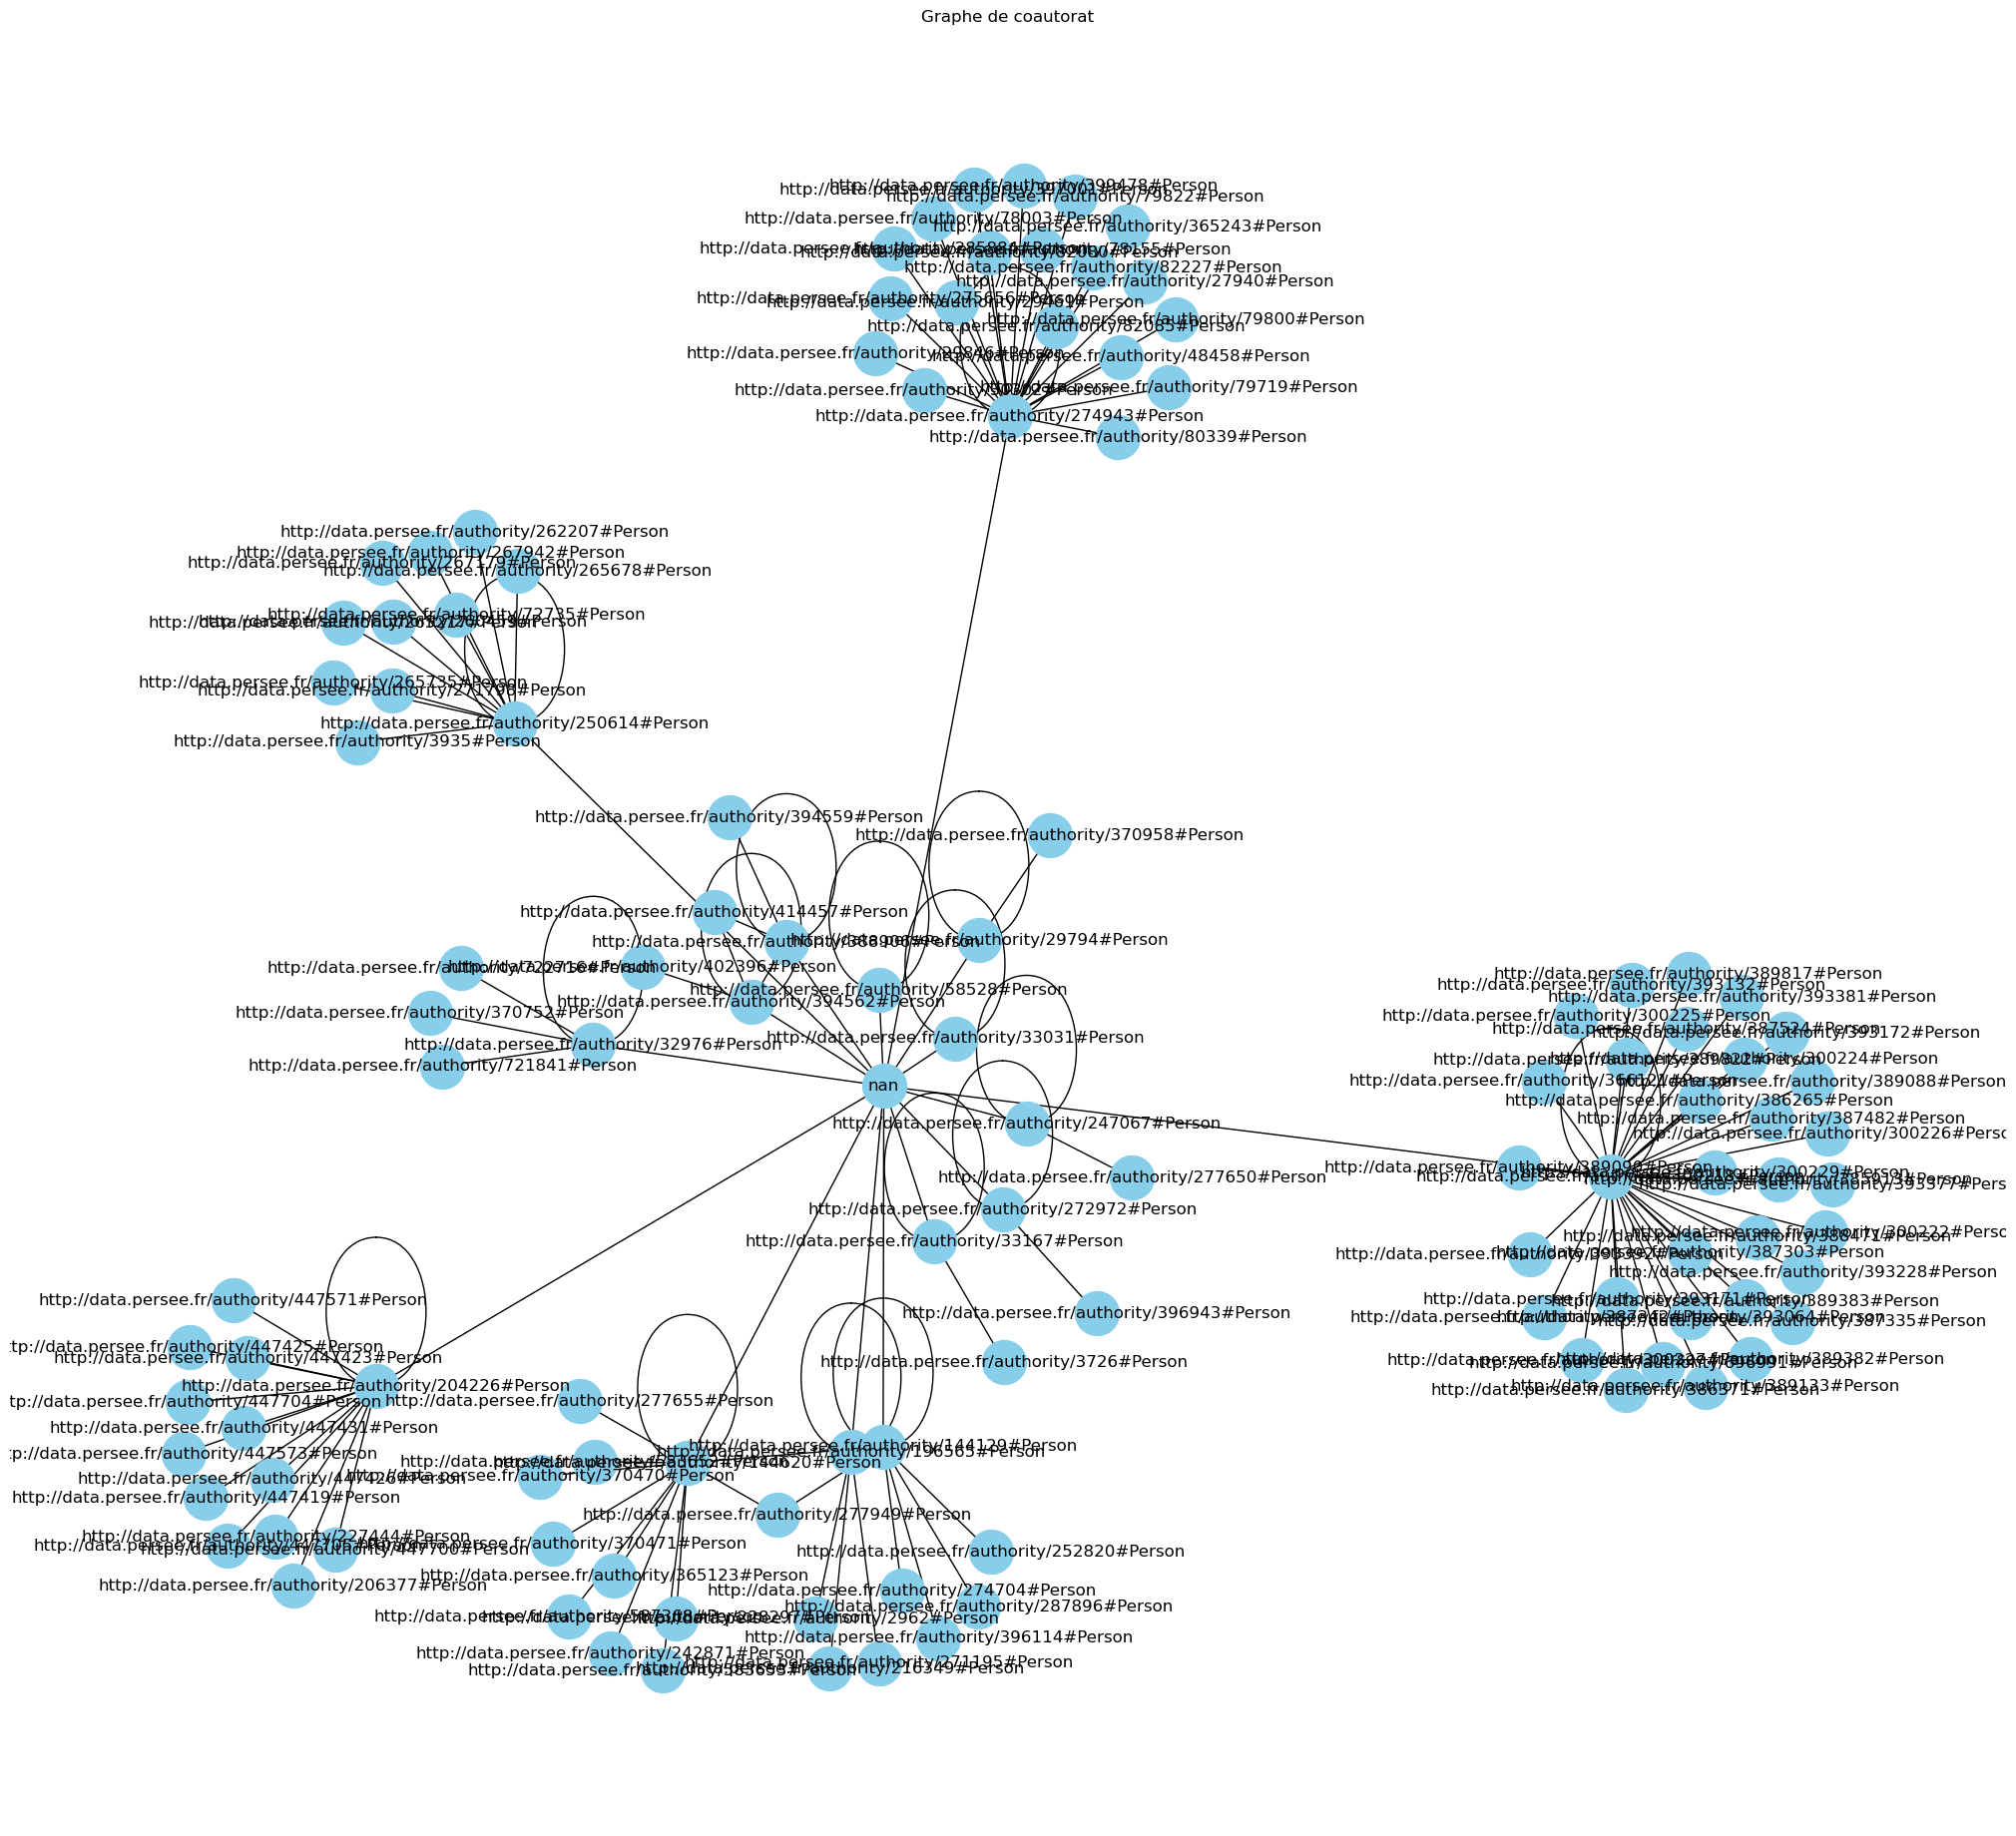

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Supposons que votre base de données est chargée dans un DataFrame appelé "data"

# Réorganiser les données pour regrouper les auteurs et les co-auteurs dans une seule colonne
data_filtré['co_auteurs'] = data_filtré.apply(lambda row: ','.join([str(row[i]) for i in range(1, 17)]), axis=1)

# Sélectionner uniquement les colonnes 'auteur' et 'co_auteurs'
data_reorganisé = data_filtré[['auteur', 'co_auteurs']]

# Créer un graphe
G = nx.Graph()

# Ajouter les auteurs et les co-auteurs comme nœuds et les liens de coautorat comme arêtes
for index, row in data_reorganisé.iterrows():
    auteur = row['auteur']
    co_auteurs = row['co_auteurs'].split(',')  # Séparer les co-auteurs
    for co_auteur in co_auteurs:
        G.add_edge(auteur, co_auteur)

# Visualiser le graphe
plt.figure(figsize=(20, 18))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='black', linewidths=1, font_size=12)
plt.title('Graphe de coautorat')
plt.savefig("C:\\Users\\evasy\\OneDrive\\Bureau\\M2 MIASHS\\Network Analysis\\Graphe1.jpg")
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]


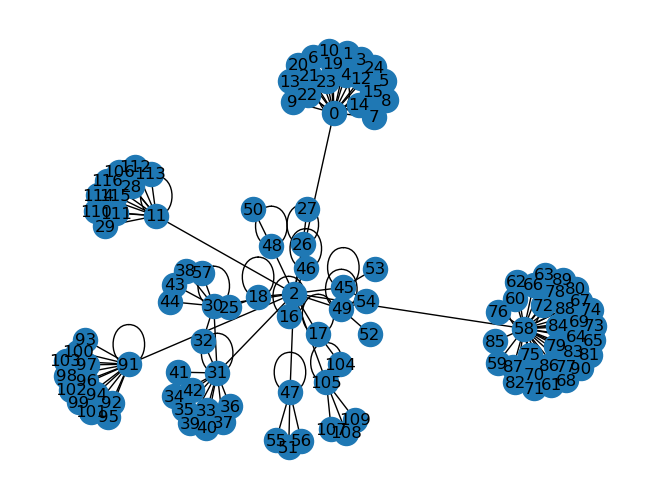

<Figure size 2000x1600 with 0 Axes>

In [17]:

# Créer un dictionnaire de correspondance pour mapper les anciens noms de nœuds aux nouveaux noms (des chiffres)
nouvelles_etiquettes = {noeud: i for i, noeud in enumerate(G.nodes)}

# Remplacer les noms des nœuds par des chiffres en utilisant le dictionnaire de correspondance
G_relabel = nx.relabel_nodes(G, nouvelles_etiquettes)

# Afficher le nouveau graphe
print(G_relabel.nodes)  # Pour vérifier les nouveaux noms des nœuds
nx.draw(G_relabel, with_labels=True)
plt.figure(figsize=(20, 16))
plt.show()


In [19]:
# Calcul du nombre de nœuds dans le graphe
nombre_noeuds = nx.number_of_nodes(G)

print("Le nombre de nœuds dans le graphe est :", nombre_noeuds)


Le nombre de nœuds dans le graphe est : 117


In [20]:
# Distribution des degrés(ou des autres mesures de centralité)
degrees = G.degree()
print(degrees)

[('http://data.persee.fr/authority/274943#Person', 22), ('http://data.persee.fr/authority/275656#Person', 1), ('nan', 16), ('http://data.persee.fr/authority/78155#Person', 1), ('http://data.persee.fr/authority/79719#Person', 1), ('http://data.persee.fr/authority/30302#Person', 1), ('http://data.persee.fr/authority/82227#Person', 1), ('http://data.persee.fr/authority/79822#Person', 1), ('http://data.persee.fr/authority/285884#Person', 1), ('http://data.persee.fr/authority/79800#Person', 1), ('http://data.persee.fr/authority/29461#Person', 1), ('http://data.persee.fr/authority/250614#Person', 13), ('http://data.persee.fr/authority/29846#Person', 1), ('http://data.persee.fr/authority/399478#Person', 1), ('http://data.persee.fr/authority/397001#Person', 1), ('http://data.persee.fr/authority/80339#Person', 1), ('http://data.persee.fr/authority/58528#Person', 3), ('http://data.persee.fr/authority/29794#Person', 4), ('http://data.persee.fr/authority/247067#Person', 4), ('http://data.persee.fr

In [21]:
import networkx as nx

# Calculer les degrés de chaque nœud
degrees = dict(G.degree())

# Calculer la moyenne des degrés
average_degree = sum(degrees.values()) / len(degrees)

print("La moyenne des degrés du graphe est :", average_degree)


La moyenne des degrés du graphe est : 2.324786324786325


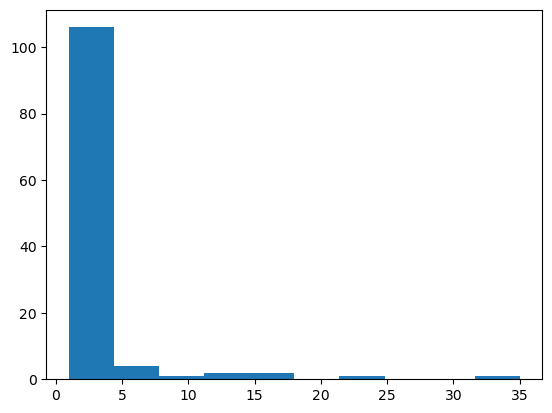

In [22]:
import numpy as np
import matplotlib.pyplot as plt
d_degree = dict(G.degree())
n, bins, patches = plt.hist(d_degree.values())
plt.savefig("C:\\Users\\evasy\\OneDrive\\Bureau\\M2 MIASHS\\Network Analysis\\Histogramme.jpg")

plt.show()

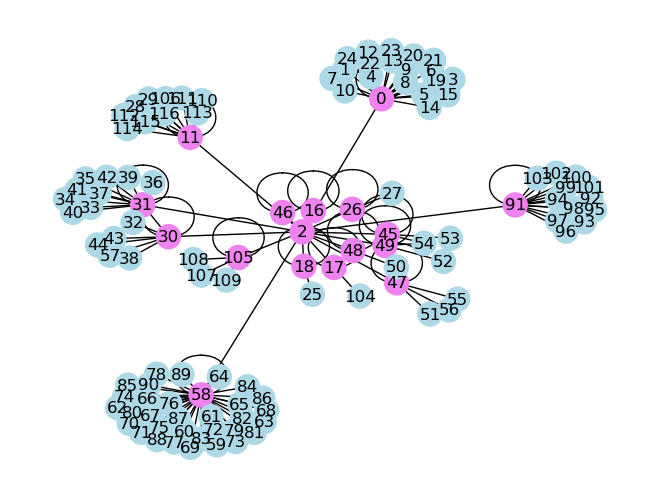

In [23]:
color_map = []
for node in G:
    if d_degree[node]<3:
        color_map.append('lightblue')
    else: 
        color_map.append('violet')      
nx.draw(G_relabel, node_color=color_map, with_labels=True)
plt.savefig("C:\\Users\\evasy\\OneDrive\\Bureau\\M2 MIASHS\\Network Analysis\\Graphe2.jpg")


In [24]:
A = nx.to_scipy_sparse_array(G) #convertir un graphe NetworkX G en une matrice d'adjacence creuse

C:\Users\evasy\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [25]:
A.todense()

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [26]:
A2 = A@A.transpose() # transposée
A2.todense()

array([[21,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0],
       [ 1,  1, 16, ...,  1,  1,  1],
       ...,
       [ 0,  0,  1, ...,  1,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  1]], dtype=int32)

In [27]:
# tous les chemins de longueur 1 ou 2
(A+A2).todense()

array([[22,  2,  2, ...,  0,  0,  0],
       [ 2,  1,  1, ...,  0,  0,  0],
       [ 2,  1, 16, ...,  1,  1,  1],
       ...,
       [ 0,  0,  1, ...,  1,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  1],
       [ 0,  0,  1, ...,  1,  1,  1]], dtype=int32)

In [28]:
A3 = A@A2.transpose()
A3.todense()

array([[41, 21, 36, ...,  1,  1,  1],
       [21,  1,  1, ...,  0,  0,  0],
       [36,  1, 20, ...,  1,  1,  1],
       ...,
       [ 1,  0,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  1,  1],
       [ 1,  0,  1, ...,  1,  1,  1]], dtype=int32)

In [29]:
# tous les chemins de longueur 1, 2 ou 3
(A+A2+A3).todense()

array([[63, 23, 38, ...,  1,  1,  1],
       [23,  2,  2, ...,  0,  0,  0],
       [38,  2, 36, ...,  2,  2,  2],
       ...,
       [ 1,  0,  2, ...,  2,  2,  2],
       [ 1,  0,  2, ...,  2,  2,  2],
       [ 1,  0,  2, ...,  2,  2,  2]], dtype=int32)

In [30]:
# calcul du PPR 
GA = nx.google_matrix(G)
print(GA)

[[0.04175824 0.04175824 0.04175824 ... 0.00128205 0.00128205 0.00128205]
 [0.85128205 0.00128205 0.00128205 ... 0.00128205 0.00128205 0.00128205]
 [0.05440705 0.00128205 0.00128205 ... 0.00128205 0.00128205 0.00128205]
 ...
 [0.00128205 0.00128205 0.00128205 ... 0.00128205 0.00128205 0.00128205]
 [0.00128205 0.00128205 0.00128205 ... 0.00128205 0.00128205 0.00128205]
 [0.00128205 0.00128205 0.00128205 ... 0.00128205 0.00128205 0.00128205]]


In [31]:
K = 50
A_K = A
for i in range(K):
    A_K = A_K@A.transpose()

In [32]:
A_tran = A.transpose()
print(A_tran.todense())
norm = A_tran.sum(axis=0)
norm_adjusted = np.array([n if n>0 else 1 for n in norm])
print(norm)
P = A_tran/norm
P.todense()

[[1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[21  1 16  1  1  1  1  1  1  1  1 12  1  1  1  1  2  3  3  1  1  1  1  1
  1  1  3  1  1  1  8 13  2  1  1  1  1  1  1  1  1  1  1  1  1  5  2  5
  3  5  1  1  1  1  2  1  1  1 34  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 14  1  1  1  1
  1  1  1  1  1  1  1  1  1  5  1  1  1  1  1  1  1  1  1  1  1]


AttributeError: 'numpy.ndarray' object has no attribute 'todense'

In [33]:
### Nous avons converti cette matrice en matrice creuse.

In [34]:
import numpy as np
from scipy.sparse import csr_matrix

A_tran = A.transpose()

# Calculer la somme des éléments sur chaque colonne de la matrice transposée
norm = A_tran.sum(axis=0)

# Ajuster la somme en remplaçant les zéros par des uns pour éviter une division par zéro
norm_adjusted = np.array([n if n > 0 else 1 for n in norm])

# Calculer la matrice P en divisant chaque élément de la matrice transposée par la norme ajustée
P = csr_matrix(A_tran / norm_adjusted)

# Afficher la matrice P sous forme dense
print(P.todense())


[[0.04761905 1.         0.0625     ... 0.         0.         0.        ]
 [0.04761905 0.         0.         ... 0.         0.         0.        ]
 [0.04761905 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [35]:
A_d = A.todense()
print(A_d)

[[1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [36]:
# matrice diagonale des degrés
D_d = np.diag([v for k,v in G.degree()])

print(D_d)

[[22  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [37]:
# simple laplacien
L_d = D_d - A_d
print(L_d)

[[21 -1 -1 ...  0  0  0]
 [-1  1  0 ...  0  0  0]
 [-1  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


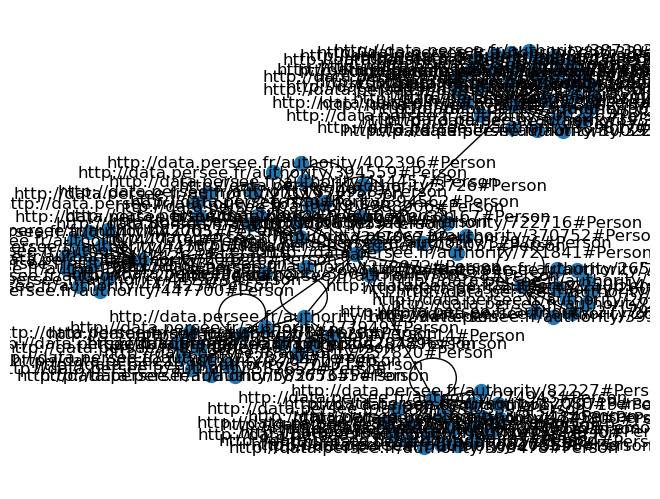

In [38]:
A_2comp = A_d.copy()
A_2comp[2,:] = 0
A_2comp[:,2] = 0
G_2comp = nx.Graph(A_2comp)

G_2comp = G.copy()
#G_2comp.remove_node(3)

nx.draw(G_2comp,node_size = 100, with_labels=True)
#plt.show()

In [39]:
A_2comp = nx.to_scipy_sparse_array(G_2comp).todense()
D_2comp = np.diag([v for k,v in G_2comp.degree()])
print(D_2comp)

[[22  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [40]:
L_2comp = D_2comp - A_2comp
print(L_2comp)

[[21 -1 -1 ...  0  0  0]
 [-1  1  0 ...  0  0  0]
 [-1  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  1]]


In [41]:
from numpy import linalg as LA ## Calcules les valeurs et vecteurs propres
eigenvalues, eigenvectors = LA.eig(L_2comp) 

In [42]:
print(eigenvalues)
print(eigenvectors)

[34.99555542 22.09246147 17.37916139 14.61737415 13.74926205 12.59869721
  8.43151875  5.52725441  4.80670422  3.15428835  1.86097951  1.82568088
  1.52045289  0.05316893  0.08559446  0.12576457  0.18409677  0.14957152
  0.33023575  6.1925824   5.64575131  0.45901096  0.49260694  0.56055942
  3.41421356  2.          0.35424869  0.8074176   3.41421356  0.58578644
  3.41421356  1.          0.58578644  0.58578644  1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          

In [43]:
## Power itération

In [44]:
A = nx.to_scipy_sparse_array(G)
A.todense()

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [45]:
P.todense()

matrix([[0.04761905, 1.        , 0.0625    , ..., 0.        , 0.        ,
         0.        ],
        [0.04761905, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.04761905, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [46]:
e_0 = np.ones(117)
print(e_0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [47]:
e_1 = P@e_0
print(e_1)

[1.91101190e+01 4.76190476e-02 3.56704913e+00 4.76190476e-02
 4.76190476e-02 4.76190476e-02 4.76190476e-02 4.76190476e-02
 4.76190476e-02 4.76190476e-02 4.76190476e-02 1.01458333e+01
 4.76190476e-02 4.76190476e-02 4.76190476e-02 4.76190476e-02
 5.62500000e-01 1.39583333e+00 1.39583333e+00 4.76190476e-02
 4.76190476e-02 4.76190476e-02 4.76190476e-02 4.76190476e-02
 4.76190476e-02 3.33333333e-01 1.39583333e+00 3.33333333e-01
 8.33333333e-02 8.33333333e-02 4.76442308e+00 9.76442308e+00
 2.01923077e-01 7.69230769e-02 7.69230769e-02 7.69230769e-02
 7.69230769e-02 7.69230769e-02 1.25000000e-01 7.69230769e-02
 7.69230769e-02 7.69230769e-02 7.69230769e-02 1.25000000e-01
 1.25000000e-01 1.96250000e+00 5.62500000e-01 3.26250000e+00
 1.39583333e+00 1.96250000e+00 3.33333333e-01 2.00000000e-01
 2.00000000e-01 2.00000000e-01 4.00000000e-01 2.00000000e-01
 2.00000000e-01 1.25000000e-01 3.20919118e+01 2.94117647e-02
 2.94117647e-02 2.94117647e-02 2.94117647e-02 2.94117647e-02
 2.94117647e-02 2.941176

In [48]:
e_2 = P@e_1
print(e_2)

[2.03770814 0.91000567 9.42635418 0.91000567 0.91000567 0.91000567
 0.91000567 0.91000567 0.91000567 0.91000567 0.91000567 1.90176001
 0.91000567 0.91000567 0.91000567 0.91000567 0.50419057 1.02155168
 1.02155168 0.91000567 0.91000567 0.91000567 0.91000567 0.91000567
 0.91000567 0.46527778 1.02155168 0.46527778 0.84548611 0.84548611
 2.17056446 2.36287215 1.34666235 0.75110947 0.75110947 0.75110947
 0.75110947 0.75110947 0.59555288 0.75110947 0.75110947 0.75110947
 0.75110947 0.59555288 0.59555288 1.40794057 0.50419057 1.47544057
 1.02155168 1.40794057 0.46527778 0.6525     0.3925     0.3925
 0.785      0.6525     0.6525     0.59555288 2.1079968  0.94387976
 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976
 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976
 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976
 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976
 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976 0.94387976

In [49]:
## Convergence de la chaîne de Markov
e = e_0
for i in range(20):
    print(e)
    e = P@e

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1.91101190e+01 4.76190476e-02 3.56704913e+00 4.76190476e-02
 4.76190476e-02 4.76190476e-02 4.76190476e-02 4.76190476e-02
 4.76190476e-02 4.76190476e-02 4.76190476e-02 1.01458333e+01
 4.76190476e-02 4.76190476e-02 4.76190476e-02 4.76190476e-02
 5.62500000e-01 1.39583333e+00 1.39583333e+00 4.76190476e-02
 4.76190476e-02 4.76190476e-02 4.76190476e-02 4.76190476e-02
 4.76190476e-02 3.33333333e-01 1.39583333e+00 3.33333333e-01
 8.33333333e-02 8.33333333e-02 4.76442308e+00 9.76442308e+00
 2.01923077e-01 7.69230769e-02 7.69230769e-02 7.69230769e-02
 7.69230769e-02 7.69230769e-02 1.25000000e-01 7.69230769e-02
 7.69230769e-02 7.69230769e-02 7.

## Fonction 4 : Ajout de clustering

In [ ]:
## Méthode Louvain 
#!pip install python-louvain

In [51]:
import networkx as nx
import community  

# les partitions en clusters en utilisant l'algorithme de Louvain
partition = community.best_partition(G)

# Affichez les clusters
clusters = {}
for node, cluster_id in partition.items():
    if cluster_id not in clusters:
        clusters[cluster_id] = []
    clusters[cluster_id].append(node)

for cluster_id, nodes in clusters.items():
    print("Cluster", cluster_id, ":", nodes)


Cluster 0 : ['http://data.persee.fr/authority/274943#Person', 'http://data.persee.fr/authority/275656#Person', 'http://data.persee.fr/authority/78155#Person', 'http://data.persee.fr/authority/79719#Person', 'http://data.persee.fr/authority/30302#Person', 'http://data.persee.fr/authority/82227#Person', 'http://data.persee.fr/authority/79822#Person', 'http://data.persee.fr/authority/285884#Person', 'http://data.persee.fr/authority/79800#Person', 'http://data.persee.fr/authority/29461#Person', 'http://data.persee.fr/authority/29846#Person', 'http://data.persee.fr/authority/399478#Person', 'http://data.persee.fr/authority/397001#Person', 'http://data.persee.fr/authority/80339#Person', 'http://data.persee.fr/authority/365243#Person', 'http://data.persee.fr/authority/82080#Person', 'http://data.persee.fr/authority/27940#Person', 'http://data.persee.fr/authority/78003#Person', 'http://data.persee.fr/authority/82085#Person', 'http://data.persee.fr/authority/48458#Person']
Cluster 1 : ['nan', '

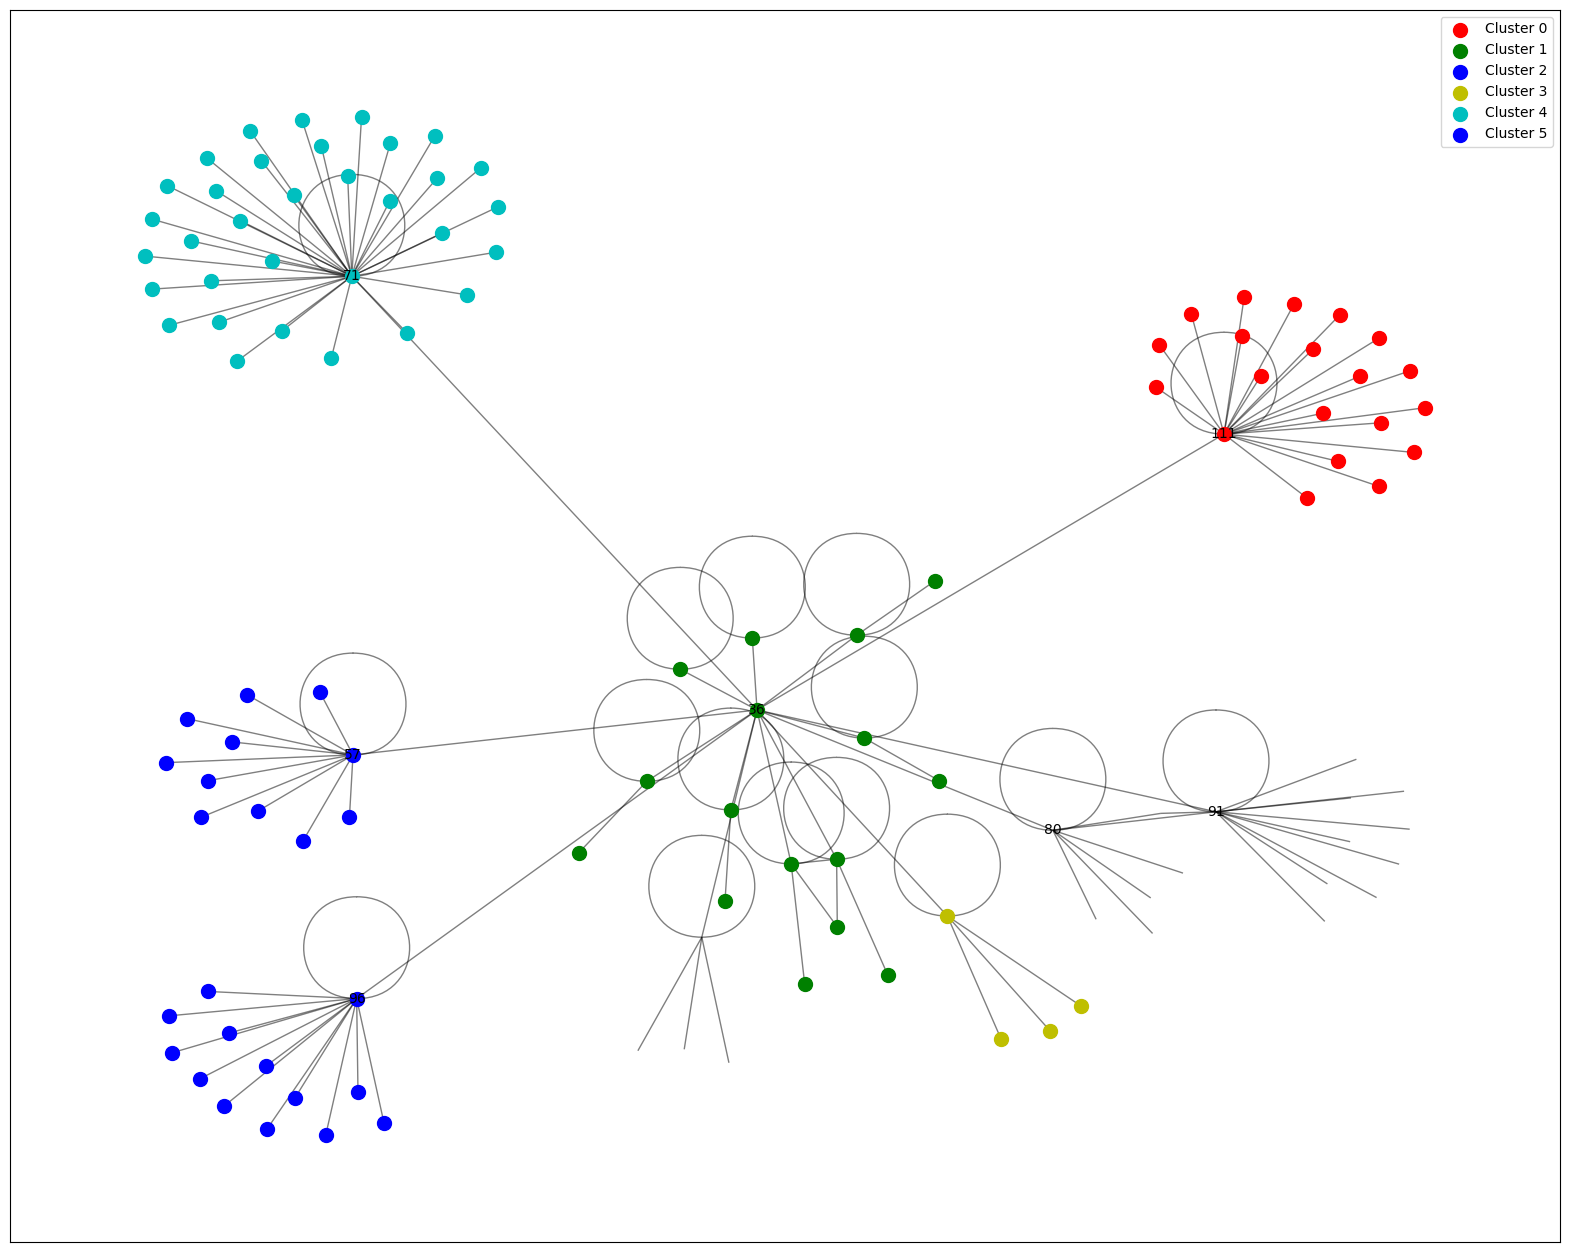

In [52]:
import networkx as nx
import community
import matplotlib.pyplot as plt


# Crée un dictionnaire pour mapper les noms des auteurs à des numéros uniques
author_names = list(set([node for edge in G.edges() for node in edge]))  # Obtenez tous les noms d'auteurs uniques
author_dict = {name: i for i, name in enumerate(author_names)}

# Remplace les noms des auteurs par des numéros dans le graphe
G = nx.relabel_nodes(G, author_dict)

# Trouve les partitions en clusters en utilisant l'algorithme de Louvain
partition = community.best_partition(G)

# Détermine les positions des nœuds pour la visualisation
pos = nx.spring_layout(G)

plt.figure(figsize=(20,16))

# Dessine les nœuds avec des couleurs correspondant aux clusters
colors = ['r', 'g', 'b', 'y', 'c','b']
for cluster_id, color in enumerate(colors):
    nodes = [node for node, cluster in partition.items() if cluster == cluster_id]
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, node_size=100, label=f'Cluster {cluster_id}')

# Dessine les arêtes
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Affichez les labels des nœuds avec parcimonie
selected_nodes = [node for node in G.nodes if len(list(G.neighbors(node))) > 5]  # Exemple : afficher uniquement les nœuds avec plus de 5 voisins
node_labels = {node: str(node) for node in selected_nodes}  # Utilisez les numéros des nœuds comme étiquettes
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Affiche la légende
plt.legend()
plt.savefig("C:\\Users\\evasy\\OneDrive\\Bureau\\M2 MIASHS\\Network Analysis\\Cluster1.jpg")

# Affiche le graphe
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]


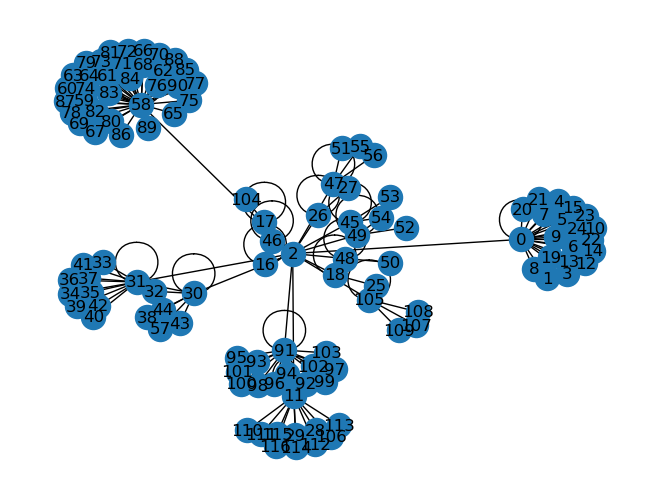

<Figure size 2000x1600 with 0 Axes>

In [53]:
# Crée un dictionnaire de correspondance pour mapper les anciens noms de nœuds aux nouveaux noms (des chiffres)
nouvelles_etiquettes = {noeud: i for i, noeud in enumerate(G.nodes)}

# Remplace les noms des nœuds par des chiffres en utilisant le dictionnaire de correspondance
G_relabel = nx.relabel_nodes(G, nouvelles_etiquettes)

# Affiche le nouveau graphe
print(G_relabel.nodes)  # Pour vérifier les nouveaux noms des nœuds
nx.draw(G_relabel, with_labels=True)
plt.figure(figsize=(20, 16))
plt.show()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

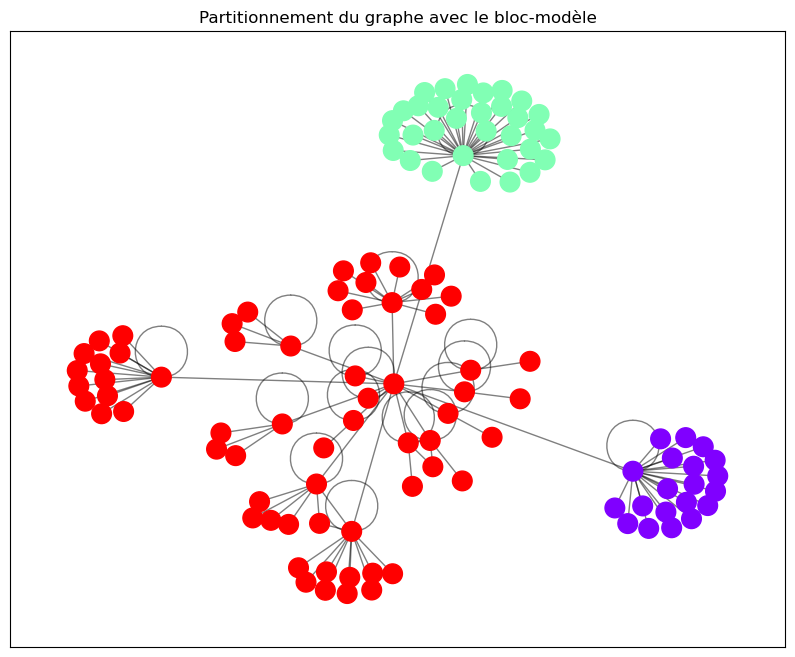

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


## Matrice d'adjacence
A = nx.adjacency_matrix(G)

# Convertir la matrice d'adjacence en une matrice numpy
A = A.toarray()

# Utilise le bloc-modèle pour détecter les communautés dans le graphe
from sklearn.cluster import SpectralClustering

# Choisir le nombre de blocs (ou communautés) que vous souhaitez détecter
num_clusters = 3

# Utilise SpectralClustering pour partitionner les nœuds en blocs
sc = SpectralClustering(n_clusters=num_clusters, affinity='precomputed', assign_labels='discretize', random_state=0)
labels = sc.fit_predict(A)

# Dessine le graphe en utilisant les blocs comme couleurs de nœuds

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap=plt.cm.rainbow, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Partitionnement du graphe avec le bloc-modèle')
plt.colorbar(label='Bloc')
plt.show()


## Fonction 5: Classification supervisée 

## Fonction 3 : Moteur de recherche

In [55]:
X = data_filtré['dcterms:title{Literal}[0]']


In [56]:
# Définir une fonction pour obtenir le type de chaque élément
def get_type(element):
    return type(element)

# Appliquer la fonction à chaque élément de la colonne
types_elements = data_filtré['dcterms:title{Literal}'].apply(get_type)

# Afficher les types uniques présents dans la colonne
types_uniques = types_elements.unique()
print("Types uniques dans la colonne 'ma_colonne':", types_uniques)


Types uniques dans la colonne 'ma_colonne': [<class 'str'> <class 'float'>]


In [57]:

# Supposons que votre DataFrame s'appelle data_filtré et que la colonne à filtrer s'appelle 'dcterms:title{Literal}'
# Convertir toutes les valeurs en chaînes de caractères
data_filtré['dcterms:title{Literal}'] = data_filtré['dcterms:title{Literal}'].astype(str)

# Filtrer les valeurs qui sont des chaînes de caractères
data_filtré_filtered = data_filtré[data_filtré['dcterms:title{Literal}'].str.isdigit()]

# Afficher le DataFrame filtré
print(data_filtré_filtered)


Empty DataFrame
Columns: [persee:dateOfPrintPublication{Literal}(xsd:gYear), auteur, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, marcrel:aut{URIRef}[16], marcrel:aut{URIRef}[17], marcrel:aut{URIRef}[18], marcrel:aut{URIRef}[19], marcrel:aut{URIRef}[20], marcrel:aut{URIRef}[21], marcrel:aut{URIRef}[22], marcrel:aut{URIRef}[23], marcrel:aut{URIRef}[24], marcrel:aut{URIRef}[25], marcrel:aut{URIRef}[26], marcrel:aut{URIRef}[27], dcterms:identifier{Literal}, dcterms:title{Literal}, cito:cites{URIRef}[0], cito:cites{URIRef}[1], cito:cites{URIRef}[2], cito:cites{URIRef}[3], dcterms:abstract{Literal}@en, dcterms:abstract{Literal}@fr, cito:cites{URIRef}[4], cito:cites{URIRef}[5], cito:cites{URIRef}[6], cito:cites{URIRef}[7], cito:cites{URIRef}[8], cito:cites{URIRef}[9], cito:cites{URIRef}[10], cito:cites{URIRef}[11], cito:cites{URIRef}[12], cito:cites{URIRef}[13], cito:cites{URIRef}[14], cito:cites{URIRef}[15], cito:cites{URIRef}[16], cito:cites{URIRef}[17], cito:cites{URIRef}[18], cito:

C:\Users\evasy\AppData\Local\Temp\ipykernel_26140\1904724520.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtré['dcterms:title{Literal}'] = data_filtré['dcterms:title{Literal}'].astype(str)


In [58]:
texte = X

In [59]:
# Filtrer les valeurs de type str
texts_str = [text for text in X if isinstance(text, str)]

# Encoder les textes en UTF-8
texts_utf8 = [text.encode('utf-8') for text in texts_str]


In [63]:
X = texts_utf8 
X

[b'Michel Vanderhoeven, De Terra Sigillata te Tongeren. III. De italische Terra Sigillata',
 b'Les motivations de la natalit\xc3\x83\xc2\xa9 \xc3\x83\xc2\xa0 Ath\xc3\x83\xc2\xa8nes aux Ve et IVe si\xc3\x83\xc2\xa8cles avant notre \xc3\x83\xc2\xa8re',
 b'G. H. Halsberghe, Standaard woordenboek van de klassieke oudheid',
 b"Marguerite Racket, Rome et les Berb\xc3\x83\xc2\xa8res. Un probl\xc3\x83\xc2\xa8me militaire d'Auguste \xc3\x83\xc2\xa0 Diocl\xc3\x83\xc2\xa9tien",
 b'Apam\xc3\x83\xc2\xa9e de Syrie. Bilan des recherches arch\xc3\x83\xc2\xa9ologiques 1965-1968. Actes du colloque tenu \xc3\x83\xc2\xa0 Bruxelles les 29 et 30 avril 1969, \xc3\x83\xc2\xa9dit\xc3\x83\xc2\xa9s par Janine Balty avec la collaboration de C\xc3\x83\xc2\xa9cile Duli\xc3\x83\xc2\xa8re et Michel Theunissen',
 b'Valeria Righini, Lineamenti di storia economica della Gallia Cisalpina : La pro duttivit\xc3\x83\xc2\xa0 fittile in et\xc3\x83\xc2\xa0 repubblicana',
 b"Claude Vatin, Recherches sur le mariage et la conditi

In [65]:

# Convertir X en DataFrame si ce n'est pas déjà fait
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X, columns=['dcterms:title{Literal}'])

## Représentation TFxIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Adapter le TfidfVectorizer et transformer les données
X_tfidf = tfidf_vectorizer.fit_transform(X['dcterms:title{Literal}'])

# Afficher les dimensions de la matrice TF-IDF
print("Dimensions de la matrice TF-IDF :", X_tfidf.shape)

# Afficher la matrice TF-IDF
np.set_printoptions(precision=1)
print(X_tfidf.toarray())


Dimensions de la matrice TF-IDF : (770, 4482)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [67]:
features_hp = vectorizer.get_feature_names_out()

In [69]:
## Représentation TFxIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Créer une instance de TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Adapter le TfidfVectorizer et transformer les données
X_tfidf = tfidf_vectorizer.fit_transform(X['dcterms:title{Literal}'])

#dimensions de la matrice TF-IDF
print("Dimensions de la matrice TF-IDF :", X_tfidf.shape)


Dimensions de la matrice TF-IDF : (770, 4482)


In [71]:
features_hp = tfidf_vectorizer.get_feature_names_out()

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

# Créer une instance de CountVectorizer avec des mots vides spécifiés
stop_words = ['le', 'la', 'les', 'de', 'du', 'des'] 
tf_vectorizer = CountVectorizer(stop_words=stop_words)


In [73]:
tf_vectorizer

CountVectorizer(stop_words=['le', 'la', 'les', 'de', 'du', 'des'])

In [74]:
from scipy.sparse import find, csr_matrix
import pandas as pd

#
# cette fonction permet d'afficher une  représentation du vecteur v
#   v : le vecteur à afficher (par ex. une ligne de la matrice X)
#   features : le vocabulaire
#   top_n : le nombre de mots maximum à afficher
def print_feats(v, features, top_n = 30):
    _, ids, values = find(v)
    feats = [(ids[i], values[i], features[ids[i]]) for i in range(len(list(ids)))]
    top_feats = sorted(feats, key=lambda x: x[1], reverse=True)[0:top_n]
    return pd.DataFrame({"word" : [t[2] for t in top_feats], "value": [t[1] for t in top_feats]})   


In [75]:
import math
from scipy.linalg import norm

# fonction calculant le cosinus entre deux vecteurs
def cosinus(i, j):
        # numérateur : <i.j>
    num = i.dot(j.transpose())[0,0]
        # dénominateur : ||i||_2 * ||j||_2
    den = norm(i.todense()) * norm(j.todense())
    if (den>0): # on vérifie que le dénominateur n'est pas nul
        return (num/den)
    else:
        return 0

In [76]:
X_tfidf

<770x4482 sparse matrix of type '<class 'numpy.float64'>'
	with 11541 stored elements in Compressed Sparse Row format>

In [77]:
print(print_feats(X_tfidf[100], features_hp, top_n=50))
print(print_feats(X_tfidf[50], features_hp, top_n=50))

             word     value
0      estampillã  0.332800
1   thodologiques  0.332800
2           vases  0.313397
3          glanum  0.299630
4         colette  0.280227
5            mont  0.272851
6         sigillã  0.272851
7         ramique  0.266461
8              bã  0.243228
9      recherches  0.233291
10             cã  0.225068
11            sur  0.206512
12             mã  0.191898
13            les  0.148556
14             la  0.118816
15             de  0.110320
          word     value
0        editã  0.282804
1    principal  0.282804
2          der  0.265594
3      neueren  0.254617
4          und  0.250766
5       kultur  0.245543
6         roms  0.245543
7    hildegard  0.238129
8    forschung  0.231861
9      spiegel  0.231861
10   temporini  0.231861
11    aufstieg  0.221641
12  niedergang  0.221641
13  geschichte  0.206688
14        welt  0.203674
15          ii  0.174061
16          im  0.165268
17     mischen  0.156194
18         par  0.154426
19          rã  0.122128

In [78]:
cosinus(X_tfidf[20], X_tfidf[15]) ## Appliquer le cosinus au 2 vecteurs pour calculer la similarité entre deux dcouments de notre corpus. 

0.014864456460005889

In [79]:
# Supprimer les lignes contenant des valeurs NaN dans votre DataFrame
data_filtré_sans_nan = data_filtré.dropna(subset=['dcterms:title{Literal}[0]'])



In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Création du moteur de recherche
def search(query, corpus, vectorizer):
    # Vectorisation de la requête de recherche
    query_vec = vectorizer.transform([query])
    
    # Calcul de la similarité entre la requête et les documents du corpus
    similarity_scores = cosine_similarity(query_vec, corpus)
    
    # Récupération des indices des documents les plus similaires
    top_indices = similarity_scores.argsort()[0][::-1]
    
    # Affichage des résultats
    for i, idx in enumerate(top_indices):
        print(f"Document {i+1}: Similarité = {similarity_scores[0][idx]}")
        print(corpus[idx])  # Afficher le contenu du document

# Créer une instance de TfidfVectorizer et l'ajuster sur le corpus
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(data_filtré_sans_nan['dcterms:title{Literal}[0]'].astype(str))



In [81]:
query = "Mot-clé de recherche"
search(query, X_tfidf, vectorizer)


Document 1: Similarité = 0.3954811204538695
  (0, 182)	0.4472034637562518
  (0, 3927)	0.4472034637562518
  (0, 3895)	0.4472034637562518
  (0, 1000)	0.3580594608848214
  (0, 3299)	0.3666460375754533
  (0, 346)	0.26315305519650617
  (0, 1369)	0.14378603039687707
  (0, 2240)	0.15966007281755915
  (0, 1110)	0.14824304289128495
Document 2: Similarité = 0.31799050555703023
  (0, 3685)	0.31527947826672287
  (0, 331)	0.2968979885045642
  (0, 1196)	0.31527947826672287
  (0, 55)	0.2654746242042928
  (0, 92)	0.2584863061310181
  (0, 98)	0.2654746242042928
  (0, 2452)	0.24709313444213413
  (0, 1002)	0.25243274966618007
  (0, 3299)	0.2584863061310181
  (0, 1899)	0.20455730728696644
  (0, 289)	0.23042257723265308
  (0, 3440)	0.24231668586204208
  (0, 949)	0.20455730728696644
  (0, 1231)	0.15219773049854068
  (0, 179)	0.20262789560374997
  (0, 1369)	0.10136948462966106
  (0, 1110)	0.20902337753318598
Document 3: Similarité = 0.2800467969486411
  (0, 775)	0.368440643924283
  (0, 1024)	0.31023789440757